In [1]:
from __future__ import print_function, division
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

DEVELOPE = False

In [2]:
matplotlib.style.use('fivethirtyeight')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10,10)
matplotlib.rcParams['axes.facecolor']='grey'

## Step1 download and read data

In [3]:
os.system("curl -O https://s3-us-west-2.amazonaws.com/nyctlc/yellow_tripdata_2015-01-06.csv.gz")
os.system("mv " + "yellow_tripdata_2015-01-06.csv.gz " + os.getenv("PUIDATA"))
os.system("gunzip " + os.getenv("PUIDATA") + "/yellow_tripdata_2015-01-06.csv.gz -d " + os.getenv("PUIDATA") + "/yellow_tripdata")

256

In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + "yellow_tripdata_2015-01-06.csv")

In [5]:
if DEVELOPE:
    df = df[::1000]
else:
    pass
print ("Shape of data\n{}".format(df.shape))

Shape of data
(77080575, 18)


## Step2 prepare data

In [6]:
df = df.drop(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
         'RateCodeID', 'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
         'tip_amount', 'tolls_amount', 'total_amount'], axis=1)
df.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.987686,40.724251,-73.973763,40.743378
1,-73.991570,40.726933,-74.004105,40.721081
2,-73.981918,40.783443,-73.952354,40.798199
3,-73.973122,40.743553,-73.919571,40.832001
4,-73.982948,40.766209,-73.984390,40.764053


### Create a latitude/longitude perimeter around JFK Airport¶
* Latitude: 40.665015 | Longitude: -73.835903
* Latitude: 40.666056 | Longitude: -73.739086
* Latitude: 40.622813 | Longitude: -73.739086
* Latitude: 40.622813 | Longitude: -73.835903

In [7]:
lat_range = [40.622813, 40.666056]
long_range = [-73.835903, -73.739086]
# Filter by latitude
jfk_df = df[df['dropoff_latitude'] >= lat_range[0]]
jfk_df = jfk_df[jfk_df['dropoff_latitude'] <= lat_range[1]]
# Filter by longitude
jfk_df = jfk_df[jfk_df['dropoff_longitude'] >= long_range[0]]
jfk_df = jfk_df[jfk_df['dropoff_longitude'] <= long_range[1]]
print ('Number of taxi dropoffs in JFK: {}'.format(len(jfk_df)))

Number of taxi dropoffs in JFK: 646902


In [8]:
#delete obvious outliers in pickup lat/long
jfk_df = jfk_df[jfk_df['pickup_latitude'] > 40.45]
jfk_df = jfk_df[jfk_df['pickup_latitude'] < 40.93]
jfk_df = jfk_df[jfk_df['pickup_longitude'] < -73.68]
jfk_df = jfk_df[jfk_df['pickup_longitude'] > -74.27]

In [9]:
jfk_df.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,642419.000000,642419.000000,642419.000000,642419.000000
mean,-73.953655,40.740475,-73.785867,40.646413
std,0.066844,0.040393,0.007931,0.004496
min,-74.233681,40.508945,-73.835899,40.622852
25%,-73.988411,40.729847,-73.789894,40.643887
50%,-73.978920,40.752102,-73.784103,40.645096
75%,-73.959396,40.763767,-73.782310,40.647099
max,-73.685936,40.928215,-73.739105,40.666054


## Step3 plot

In [10]:
os.system("curl -O http://catalog.civicdashboards.com/dataset/11fd957a-8885-42ef-aa49-5c879ec93fac/resource/28377e88-8a50-428f-807c-40ba1f09159b/download/nyc-zip-code-tabulation-areas-polygons.geojson")
os.system("mv " + "nyc-zip-code-tabulation-areas-polygons.geojson " + os.getenv("PUIDATA"))
nyc = gpd.read_file(os.getenv("PUIDATA") + "/" + 'nyc-zip-code-tabulation-areas-polygons.geojson')

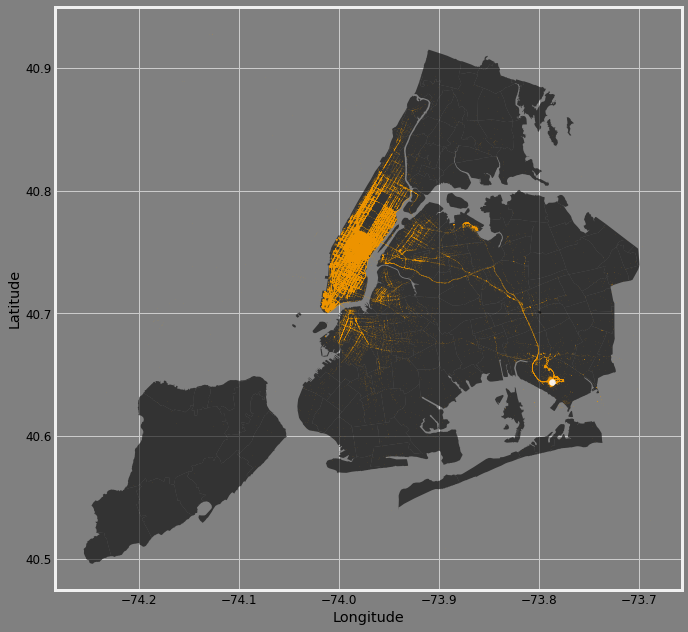

Figure 1. Start locations of NYC yellow taxi trips to JFK airport in 2015. Points marked in yellow are the pickup locations. The bigger point marked in white is the location of JFK airport. Most of trips started from Manhattan.


In [12]:
fig = plt.figure(facecolor='grey')
ax = fig.add_subplot(111)
nyc.plot(ax=ax, color='k', alpha=0.6)
plt.scatter(jfk_df['pickup_longitude'], jfk_df['pickup_latitude'], marker='.', s=0.005, color='orange', alpha=1)
plt.scatter(-73.787495, 40.6444345, marker='o', color='w', alpha=0.9)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('Figure1', dpi=600, facecolor=fig.get_facecolor(), transparent=True)
plt.show()
print ('Figure 1. Start locations of NYC yellow taxi trips to JFK airport in ' +
       '2015. Points marked in yellow are the pickup locations. The bigger ' +
       'point marked in white is the location of JFK airport. Most of ' +
       'trips started from Manhattan.')